Phần này làm theo pipeline của Face Recorgnition:
1. face detection 
2. Crop/Alignment
3. face classification
4. face verification

Dùng các pretrain model có sẵn của MTCNN và VGGFace2

In [1]:
!sudo pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-rgwg0ckj
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-rgwg0ckj
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=761d75a40d2cb43859a40d3d77491b3d37d4fbab15c891f3daecad1cd4140841
  Stored in directory: /tmp/pip-ephem-wheel-cache-3znu6cbt/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [2]:
! pip install Keras-Applications

     |████████████████████████████████| 51kB 2.6MB/s 


In [3]:
!sudo pip install mtcnn

     |████████████████████████████████| 2.3MB 4.8MB/s 


### Face detection with MTCNN

In [4]:
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

In [5]:
def extract_face(filename, required_size=(224, 224)):
	pixels = pyplot.imread(filename)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

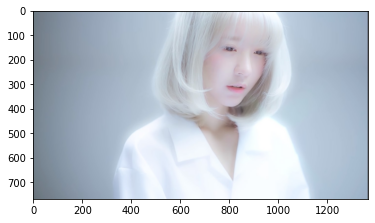

In [6]:
img = pyplot.imread(r"/content/drive/My Drive/Project_CCCD/yurisa.jpg")
pyplot.imshow(img)

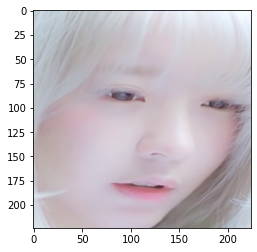

In [7]:
pixels = extract_face(r"/content/drive/My Drive/Project_CCCD/yurisa.jpg")
pyplot.imshow(pixels)
pyplot.show()

###VGGFace2 Model

In [8]:
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

In [9]:
def extract_face(filename, required_size=(224, 224)):
	pixels = pyplot.imread(filename)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

Face prediction

In [10]:
pixels = extract_face(r"/content/drive/My Drive/Project_CCCD/yurisa.jpg")
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
samples = preprocess_input(samples, version=2)
model = VGGFace(model='resnet50')
yhat = model.predict(samples)
results = decode_predictions(yhat)
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

1351680/1346516 [==============================] - 0s 0us/step
b' Mariko_Shinoda': 11.270%
b' Asami_Konno': 8.089%
b' Sayumi_Michishige': 5.971%
b' Rina_Koike': 5.169%
b' Yui_Aragaki': 3.815%


### Face verification

In [11]:
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

In [12]:
def extract_face(filename, required_size=(224, 224)):
	pixels = pyplot.imread(filename)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

Embedding face

In [13]:
def get_embeddings(filenames):
	faces = [extract_face(f) for f in filenames]
	samples = asarray(faces, 'float32')
	samples = preprocess_input(samples, version=2)
	model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
	yhat = model.predict(samples)
	return yhat

Đo độ match(với threshold = 0.5)

In [17]:
def is_match(known_embedding, candidate_embedding, thresh=0.5):
	# cosine similarity
	score = 1 - cosine(known_embedding, candidate_embedding)
	if score >= thresh:
		print('>face is a Match (%.3f >= %.3f)' % (score, thresh))
	else:
		print('>face is NOT a Match (%.3f < %.3f)' % (score, thresh))

In [18]:
# Đoạn này truyền vào bao nhiêu ảnh cũng được
# Ảnh cần check sẽ ở đầu để so sánh vói các ảnh còn lại trong filenames
filenames = [r"/content/drive/My Drive/Project_CCCD/data/images/SonNguyenTruong/Son_Nguyen_Truong_0000.jpg",r"/content/drive/My Drive/Project_CCCD/data/images/SonNguyenTruong/Son_Nguyen_Truong_0001.jpg"
              ,r"/content/drive/My Drive/Project_CCCD/data/images/SonNguyenTruong/Son_Nguyen_Truong_0002.jpg",r"/content/drive/My Drive/Project_CCCD/data/images/SonNguyenTruong/Son_Nguyen_Truong_0003.jpg"]
embeddings = get_embeddings(filenames)
sharon_id = embeddings[0]
print('Positive Tests')
is_match(embeddings[0], embeddings[1])
is_match(embeddings[0], embeddings[2])
print('Negative Tests')
is_match(embeddings[0], embeddings[3])

Positive Tests
>face is a Match (0.741 >= 0.500)
>face is a Match (0.710 >= 0.500)
Negative Tests
>face is a Match (0.729 >= 0.500)


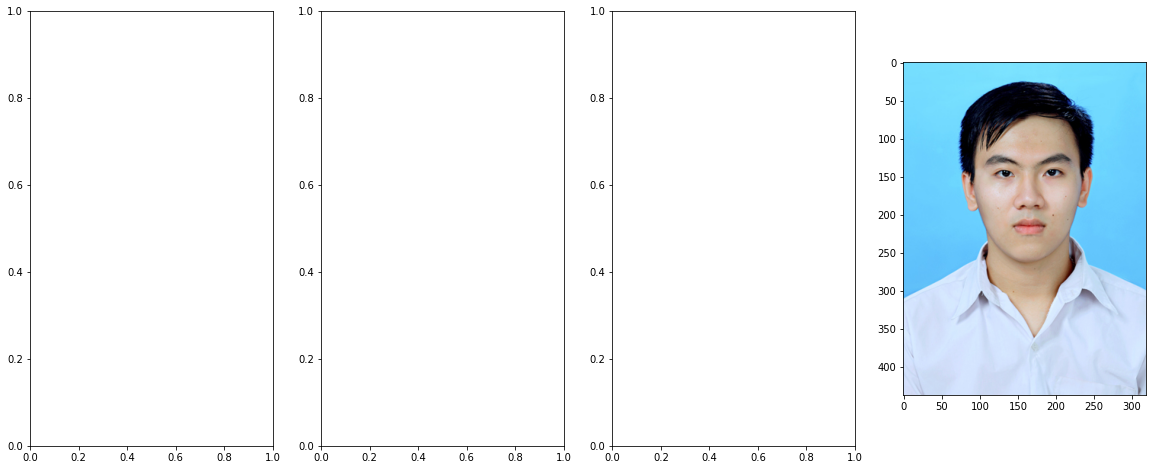

In [16]:
fig, ax = pyplot.subplots(nrows=1, ncols=4, figsize=(20, 8))

for img in filenames:
  img = pyplot.imread(img)
  pyplot.imshow(img)